<a href="https://colab.research.google.com/github/gouravgujariya/wine-Quality-pridictor-with-differenent-classifiers/blob/main/wine_classificatioin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Python Scripts/kaggle/homework/winequality-red.csv")

In [4]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
sns.set_style(style='darkgrid')

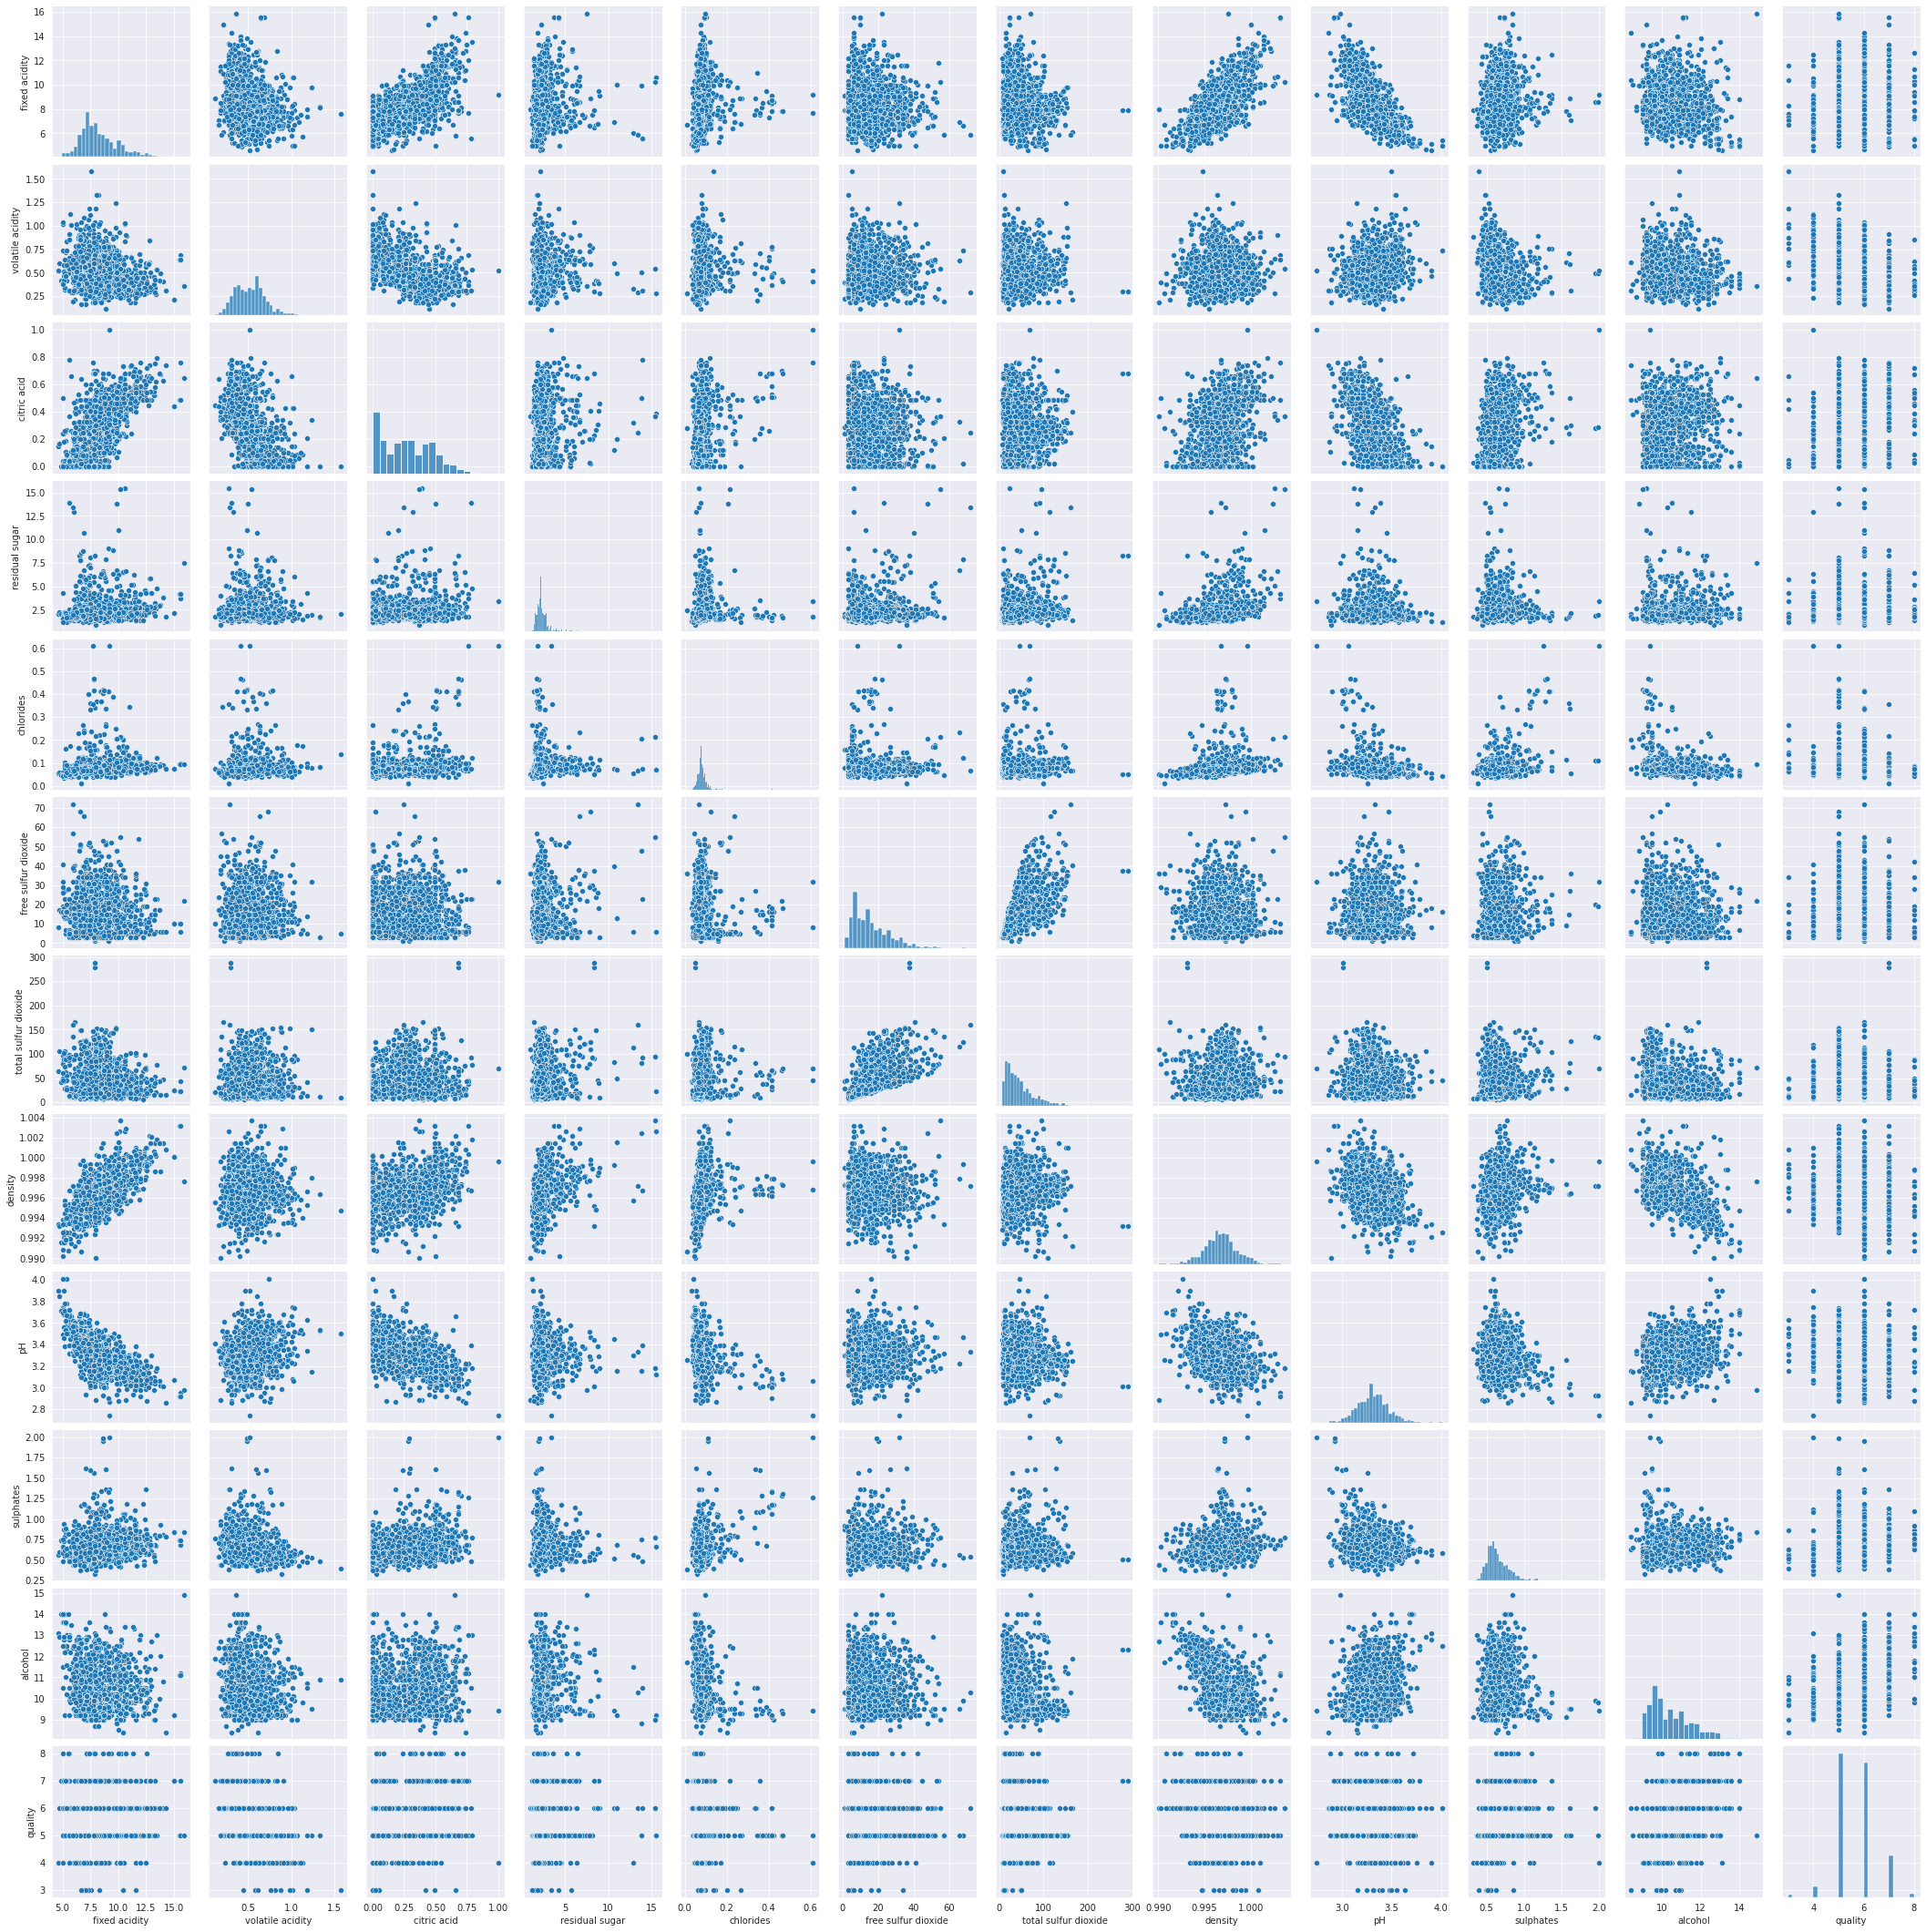

In [ ]:
sns.pairplot(df)

In [ ]:
correlation=df.corr()

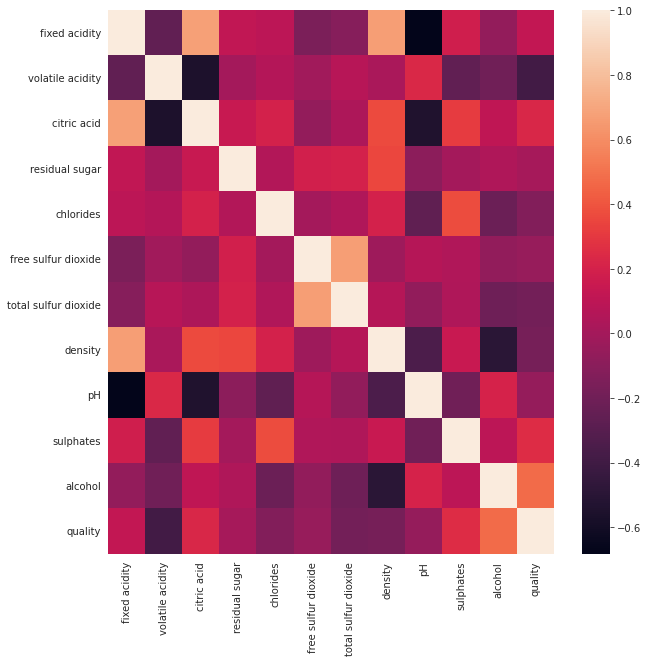

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation)

In [ ]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [8]:
X=df.drop('quality',axis=1)

In [9]:
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [10]:
Y = df['quality'].apply(lambda y_value: 0 if y_value<5 else 1 if y_value<=6  else 2)

In [ ]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [6]:
from sklearn.svm import SVC

In [11]:
xtr,xte,ytr,yte=train_test_split(X,Y,test_size=0.2,random_state=2)

In [12]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import gride

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [18]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,logistic_regression,0.830519,{'C': 5}
1,svm,0.823640,"{'C': 1, 'kernel': 'linear'}"
2,random_forest,0.818644,{'n_estimators': 10}


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
model_params = {
    'logistic_regression' : {
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        } }   
}

In [20]:
logir=cross_val_score(LogisticRegression(solver='liblinear',C= 5), X, Y,cv=3)

In [21]:
svc=cross_val_score(SVC(gamma='auto',C= 1, kernel= 'linear'), X, Y,cv=3)

In [24]:
rancla=cross_val_score(RandomForestClassifier(n_estimators=10),X, Y,cv=3)

In [25]:
print("logistic:",np.average(logir))
print("svc:",np.average(svc))
print("random:",np.average(rancla))

logistic: 0.82989368355222
svc: 0.8248905565978736
random: 0.8223889931207005
